<a href="https://colab.research.google.com/github/jlohunecke/ml/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [24]:
no_epochs = 10
size_kernel = 4

In [25]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [26]:
# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (size_kernel, size_kernel), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [27]:
# Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=no_epochs, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 62s 32ms/step - loss: 0.1411 - accuracy: 0.9571 - val_loss: 0.0448 - val_accuracy: 0.9866
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.0305 - val_accuracy: 0.9895
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0322 - accuracy: 0.9900 - val_loss: 0.0282 - val_accuracy: 0.9917
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0340 - val_accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0188 - accuracy: 0.9940 - val_loss: 0.0299 - val_accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0268 - val_accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0116 - accuracy: 0.9964 - val_loss: 0.0290 -

In [28]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

313/313 [==============================] - 4s 12ms/step - loss: 0.0321 - accuracy: 0.9924
Test loss: 0.0321
Test accuracy: 0.9924


In [29]:
# Predict labels for the test set
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# Find misclassified images
misclassified_indices = np.where(predicted_labels != y_test)[0]

313/313 [==============================] - 3s 8ms/step


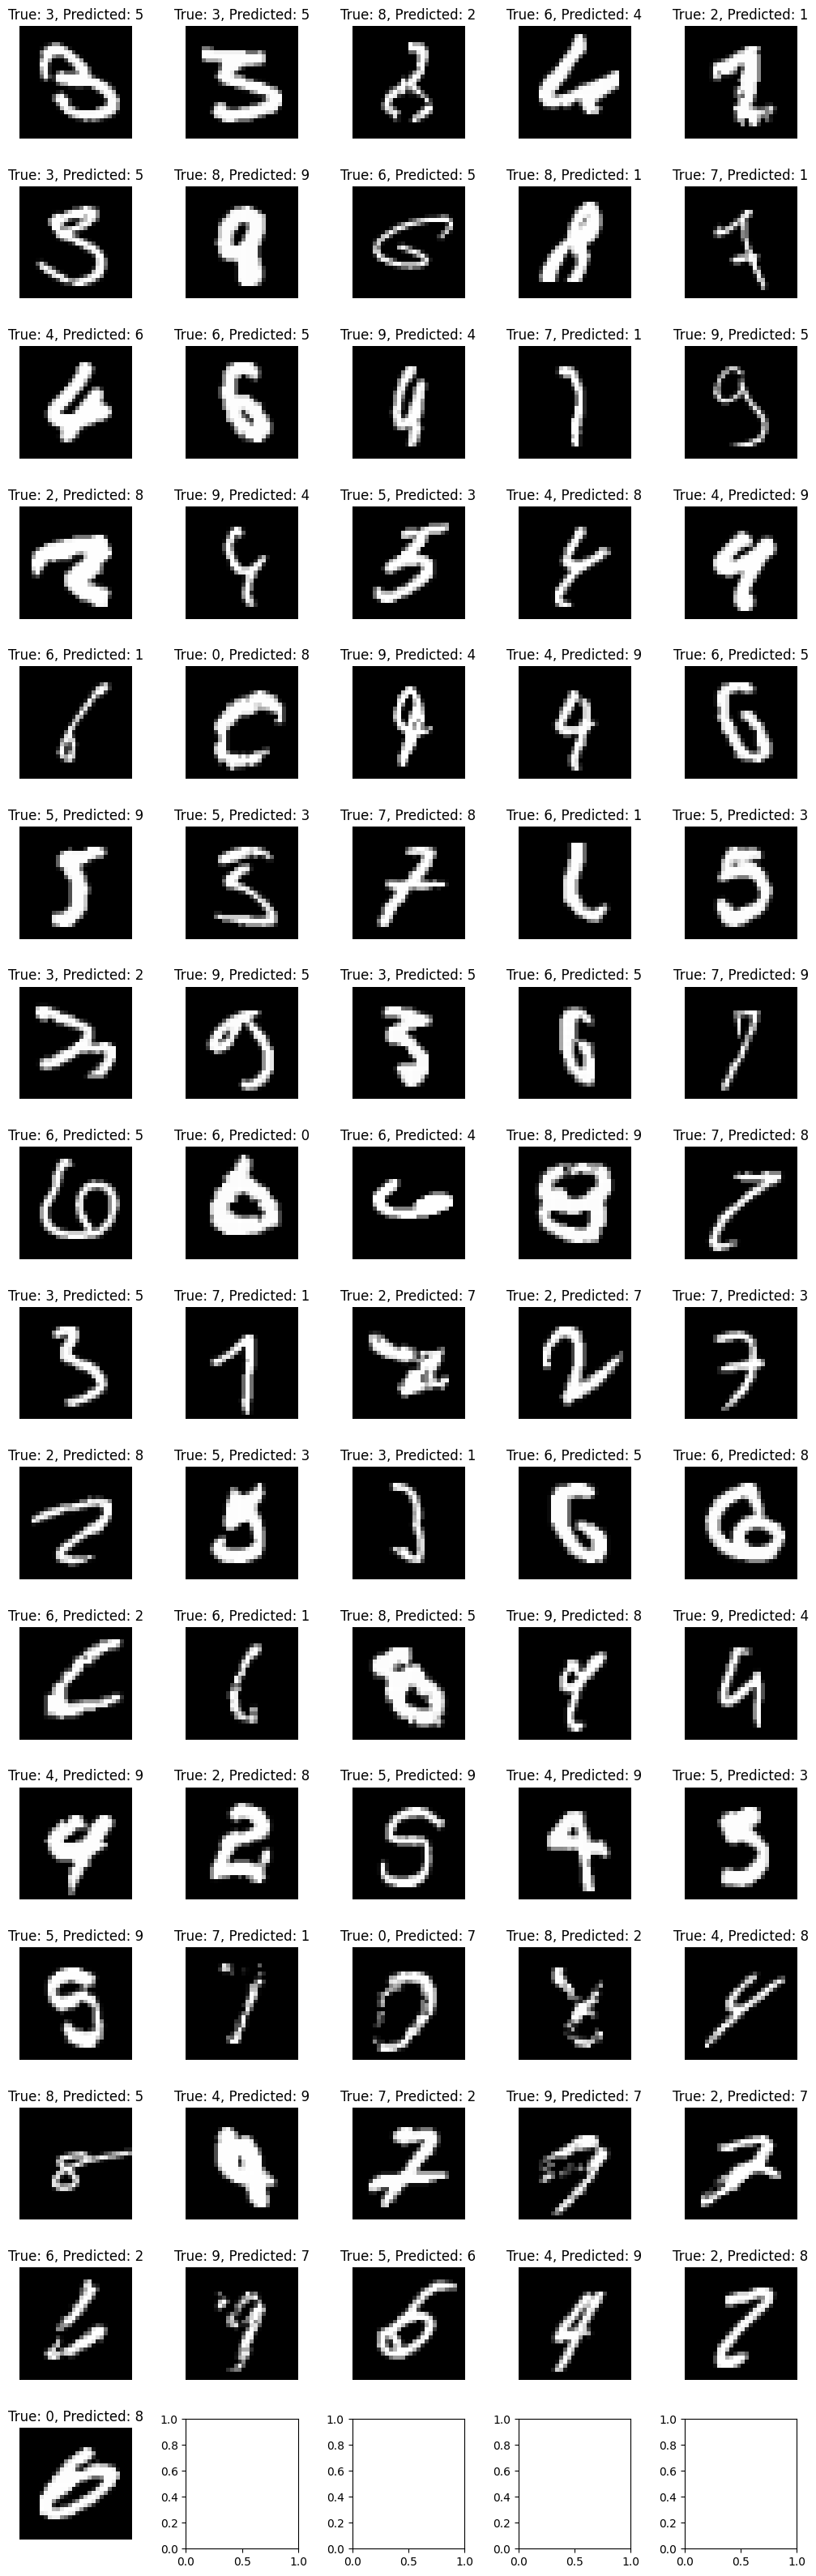

In [30]:
# Plot misclassified images
num_misclassified = len(misclassified_indices)
num_rows = int(np.ceil(num_misclassified / 5))
fig, axes = plt.subplots(num_rows, 5, figsize=(10, 2 * num_rows))

for i, idx in enumerate(misclassified_indices):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f'True: {y_test[idx]}, Predicted: {predicted_labels[idx]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

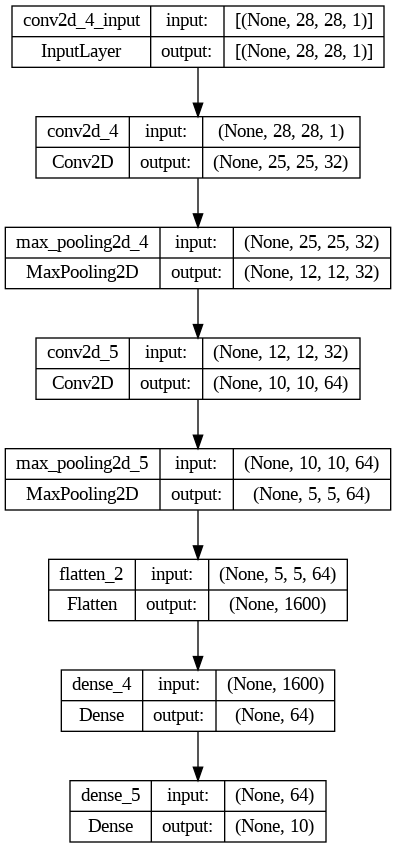

In [31]:
tf.keras.utils.plot_model(model,show_shapes=True)